<a href="https://colab.research.google.com/github/varunmeg4/uom_2025_ai_assessments/blob/main/CurveRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Example1.xlsx to Example1 (2).xlsx


In [ ]:
data = pd.read_excel("Example1.xlsx")
print(data)


    Input X  Output Y
0         0         5
1         1        12
2         2        25
3         3        44
4         4        69
5         5       100
6         6       137
7         7       180
8         8       229
9         9       284
10       10       345
11       11       412
12       12       485
13       13       564
14       14       649
15       15       740
16       16       837
17       17       940
18       18      1049
19       19      1164
20       20      1285


In [ ]:
x1 = data['Input X'].values
print(x1)
x2 = []
for i in x1:
  x2.append(int(i**2))
x2 = np.array(x2)
print(x2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361 400]


In [ ]:
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
y = data['Output Y'].values

x_final = np.hstack((x1, x2))
print(x_final)
#

[[  0   0]
 [  1   1]
 [  2   4]
 [  3   9]
 [  4  16]
 [  5  25]
 [  6  36]
 [  7  49]
 [  8  64]
 [  9  81]
 [ 10 100]
 [ 11 121]
 [ 12 144]
 [ 13 169]
 [ 14 196]
 [ 15 225]
 [ 16 256]
 [ 17 289]
 [ 18 324]
 [ 19 361]
 [ 20 400]]


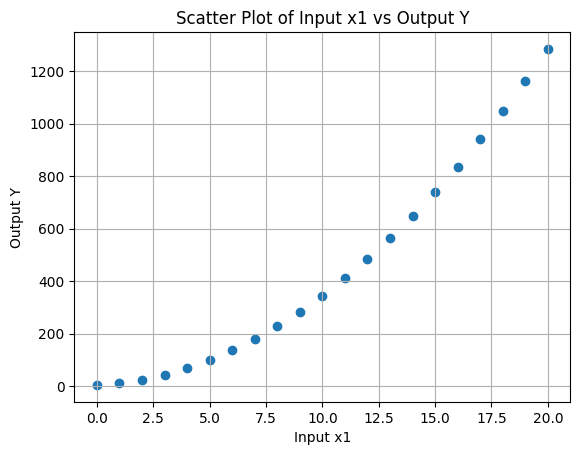

In [ ]:
plt.scatter(x1, y)
plt.xlabel('Input x1')
plt.ylabel('Output Y')
plt.title('Scatter Plot of Input x1 vs Output Y')
plt.grid(True)
plt.show()

In [ ]:
max_iteration = 500
learning_rate = 0.03


In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(4,), max_iter=max_iteration, learning_rate_init=learning_rate)

In [ ]:
nn_model.fit(x_final, y)

MLPRegressor(hidden_layer_sizes=(4,), learning_rate_init=0.03, max_iter=500)

In [ ]:
loss_values=[]
for i in range(max_iteration):
  nn_model.partial_fit(x_final,y)
  y_pred_partial=nn_model.predict(x_final)
  loss=np.mean((y-y_pred_partial)**2)
  loss_values.append(loss)

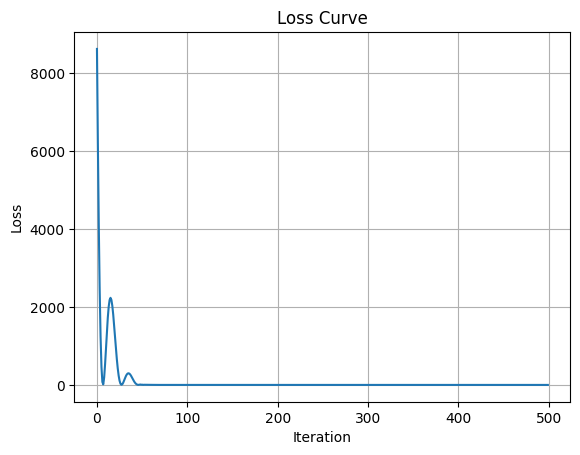

In [ ]:
plt.plot(range(max_iteration),loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.show()

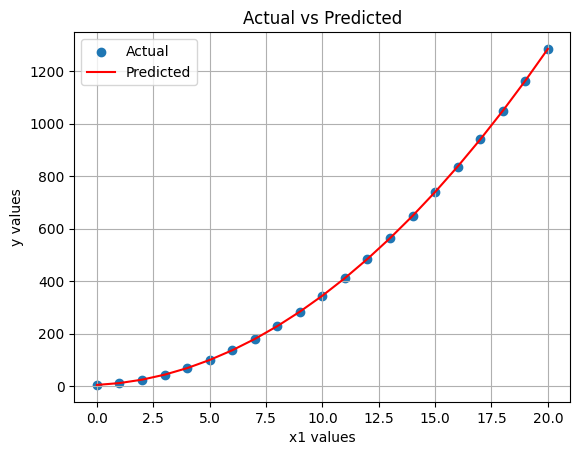

In [ ]:
plt.scatter(x1,y,label='Actual')
plt.plot(x1,y_pred_partial, color='red', label='Predicted')
plt.xlabel("x1 values")
plt.ylabel('y values')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()